In [12]:
import cv2
import glob
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

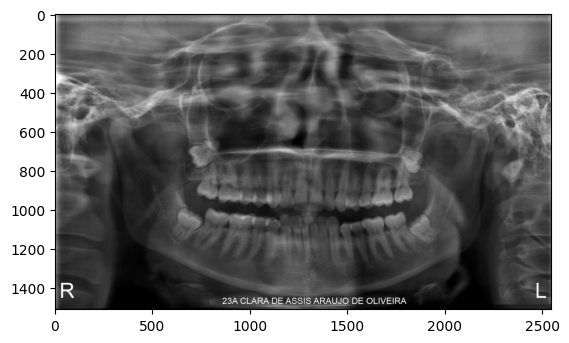

In [13]:
def open_img(image_path):
    """
            Funcao responsavel por carregar imagens de um diretorio
            Arguments:
              image_path: Caminho do diretorio das imagens
            Return:
              dataset: Vetor, onde cada posição possui uma imagem carregada do diretório
        """
    dataset = []
    #carrega as imagens do diretorio
    for i in glob.glob(image_path + '/*.png', recursive=True):
        dataset.append(cv2.imread(i))
    for j in glob.glob(image_path + '/*.jpg', recursive=True):
        dataset.append(cv2.imread(j))
    # for k in glob.glob(image_path + '/*.gif', recursive=True):
    #     dataset.append(cv2.imread(k))

    return dataset

dataset = open_img('dataset/')
dataset_gray = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in dataset]
plt.imshow(dataset_gray[4],cmap='gray')

In [14]:
# import the necessary packages
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# c:\Users\stefane.santos\Desktop\git\digital-image-processing\trab3\LPB.ipynbstore the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist,lbp

In [15]:
lbp = LocalBinaryPatterns(24,8)
image = dataset_gray[0]
hist,image_lbp = lbp.describe(image)

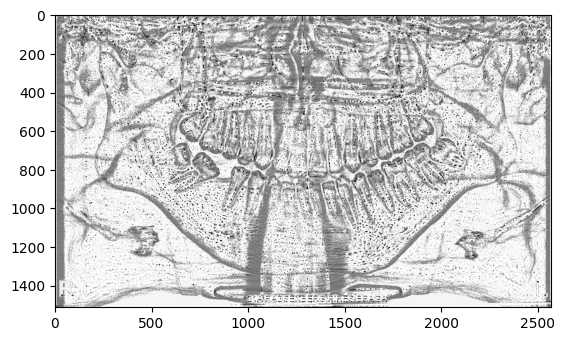

In [17]:
plt.imshow(image_lbp,cmap='gray')